<a href="https://colab.research.google.com/github/AlbertoEli/UANL_Mineria_de_Datos/blob/main/AvancePIA_II_Grupo01_Equipo4_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo avance de PIA

Equipo: 4

Grupo: 001, lunes

Integrantes
*   1877283, Cavazos Huerta, Sandra María.				  
*   1869764, Elizondo Villarreal, Alberto.						
*   1867031, Sánchez Tovar, Arturo Isaac.				
*   1862646, Sepulveda Bermudez, Marlene Michel. 		
*   1877498, Villarreal Garza, Diana. 				   	







## Base de datos secundaria 


Al trabajar con nuestra base de datos principal (Water Quality) nos percatamos que las características de la base de datos no eran favorables para obtener descripción estadística útil para cumplir nuestros objetivos.
Por esta razón decidimos trabajar con nuestra base de datos secundaria (Climate Change).

###**1. Título de la base de datos**



  a) Nombre: Climate Change: Earth Surface Temperature Data

  b) URL: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

###**2 Descripción de Datos**









a) Descripción de la Base de Datos.

> Se tomaron los archivos de "GlobalLandTemperaturesByCountry" y el archivo "GlobalTemperatures". 
>En el primer archivo,"GlobalLandTemperaturesByCountry", nos muestra una tabla con la temperatura promedio mensual por país. Se tiene registro desde 1743 hasta 2013 de 243 países. 

b) Descripción de las columnas.

Esta tabla está compuesta de las siguientes columnas:

*   dt
> Fecha en la cual se obtuvieron los datos. Esta fecha es mensual y está disponible desde finales del 1743 hasta finales del 2013.

* AverageTemperature
> Promedio de Temperatura (grados Celsius).

* AverageTemperatureUncertainty
> El intervalo de confianza del 95% sobre el Promedio de Temperatura (grados Celsius).

* Country
> El país en estudio. Se tienen 243 registros únicos.

###**3. Justificación del uso de datos**

a) Características Destacables
>Dentro de las características por las cuales nos llamaron la atención estos datos fue el registro de las temperaturas desde hace más de 200 años, el valor de incertidumbre del 95% y la división para más de 200 diferentes paises.

> Lo que nos hizo querer trabajar estos datos fue que, ya que tenemos muchos registros de diferentes países, podemos desarrollar una serie de tiempo de algunos países de interés.

b) Beneficios
>En los últimos 50 años se ha hablado mucho del tema de cambio climático, y aunque vemos noticias y percibimos cambios en el ambiente, no le damos la importancia a este tema como sociedad. Nuestra intención con este trabajo es mostrar de una manera más clara estos cambios climáticos y cómo va empeorando.

>Entre los beneficios de trabajar con estos datos se encuentra el formar una Serie de Tiempo a través de los años para observar el aumento de la temperatura a nivel global y por países.

###**4. Objetivos**



Objetivo principal
*   Generar pronósticos de los impactos del cambio climático en países de interés y de manera global.

Objetivo secundario
*   Verificar el comportamiento del cambio climático de diferentes países en base a los promedios de sus temperaturas.

###**5. Desarrollo de las Herramientas**

Importación de Librerías y Base de Datos

In [47]:
#Importar Librerías y Base de Datos
import pandas as pd
import numpy as np
import json

df2 = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df3 = pd.read_csv("GlobalTemperatures.csv")


Visualización de Filas, Columnas de las Bases de Datos

In [48]:
print("Las bases de datos sin manipulación son las siguientes")
print(" ")
print("BASE DE DATOS DE TEMPERATURAS POR PAISES")
df2.head(10)

Las bases de datos sin manipulación son las siguientes
 
BASE DE DATOS DE TEMPERATURAS POR PAISES


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [49]:
print("BASE DE DATOS DE TEMPERATURAS GLOBALES")
df3.head(10)

BASE DE DATOS DE TEMPERATURAS GLOBALES


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


Cambio de Nombres en las Columnas de la Base de Datos de Temperaturas por País

In [50]:
#Trato de la variable df2
print("Número de Filas y Columnas: ",df2.shape) #Número de Filas y Columnas

df2 = df2.rename(columns = {
    'dt' : 'Fecha',
    'AverageTemperature' : 'Promedio_Temperatura',
    'AverageTemperatureUncertainty' : 'Promedio_Temperatura_inc',
    'Country' : 'Pais'
})

df2.head(10)

Número de Filas y Columnas:  (577462, 4)


,Fecha,Promedio_Temperatura,Promedio_Temperatura_inc,Pais
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


Cambio de Nombres en las Columnas de la Base de Datos de Temperaturas Globales

In [51]:
#Trato de la variable df3
print("Número de Filas y Columnas: ",df3.shape) #Número de Filas y Columnas
#df3.dtypes
df3 = df3.rename(columns = {
    'dt' : 'Fecha',
    'LandAverageTemperature' : 'Prom_Temperatura_Tierra',
    'AverageTemperatureUncertainty' : 'Inc_Prom_Temperatura_Tierra',
    'LandMaxTemperature' : 'Max_Temperatura_Tierra',
    'LandMaxTemperatureUncertainty':'Inc_Max_Temperature_Tierra',
    'LandMinTemperature' : 'Min_Temperatura_Tierra',
    'LandMinTemperatureUncertainty' : 'Inc_Min_Temperatura_Tierra',
    'LandAndOceanAverageTemperature' : 'Prom_Temperatura_TO',
    'LandAndOceanAverageTemperatureUncertainty' : 'Inc_Prom_Temperatura_TO'
})

df3.head(10)

Número de Filas y Columnas:  (3192, 9)


,Fecha,Prom_Temperatura_Tierra,LandAverageTemperatureUncertainty,Max_Temperatura_Tierra,Inc_Max_Temperature_Tierra,Min_Temperatura_Tierra,Inc_Min_Temperatura_Tierra,Prom_Temperatura_TO,Inc_Prom_Temperatura_TO
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


Revisión de Celdas Vacías

In [52]:
#Verificación de nulos df2
df2.isnull().sum()

Fecha                           0
Promedio_Temperatura        32651
Promedio_Temperatura_inc    31912
Pais                            0
dtype: int64

In [53]:
#Verificación de nulos df2
df3.isnull().sum()

Fecha                                   0
Prom_Temperatura_Tierra                12
LandAverageTemperatureUncertainty      12
Max_Temperatura_Tierra               1200
Inc_Max_Temperature_Tierra           1200
Min_Temperatura_Tierra               1200
Inc_Min_Temperatura_Tierra           1200
Prom_Temperatura_TO                  1200
Inc_Prom_Temperatura_TO              1200
dtype: int64

Eliminación de filas con celdas vacías

In [54]:
#Eliminación de datos nulos df2
df2 = df2.dropna(axis = 0, how='any')

In [55]:
#Eliminación de datos nulos df2
df3 = df3.dropna(axis = 0, how='any')

Agregamos 2 columnas para el Máximo y el Mínimo por registro. Esto para tener unas columnas donde se pueda representar mejor la incertidumbre de la Temperatura promedio.

In [56]:
#Agregar columnas de Max y Min en df2
df2['Min'] = df2.Promedio_Temperatura - df2.Promedio_Temperatura_inc 
df2['Max'] = df2.Promedio_Temperatura + df2.Promedio_Temperatura_inc

Asignación de Clases

Para poder cumplir con nuestro objetivo de verificar el comportamiento de la temperatura y del cambio climático de diferentes países, asignamos varias clases de los países de interés. 
Se seleccionaron estos países debido a su ubicación geográfica, estos fueron los países de interés:


*   México
*   Argentina
*   India
*   Estados Unidos
*   Rusia



In [57]:
#Clases de los paises de intéres en df2

#Clase de Argentina
Arg = df2[df2['Pais']=='Argentina']

#Clase de India
Ind = df2[df2['Pais']=='India']

#Clase de Mexico
Mex = df2[df2['Pais']=='Mexico']

#Clase de United States
USA = df2[df2['Pais']=='United States']

#Clase de Rusia
Rus = df2[df2['Pais']=='Russia']

Verificación de Datos nulos en las clases de los países

In [58]:
#Revisión de Datos nulos en df2
Arg.isnull().sum()
Ind.isnull().sum()
Mex.isnull().sum()
USA.isnull().sum()
Rus.isnull().sum()

Fecha                       0
Promedio_Temperatura        0
Promedio_Temperatura_inc    0
Pais                        0
Min                         0
Max                         0
dtype: int64

Selección de Paises de Interés

In [59]:
#Agrupaciones de las clases en df2
Arg.to_csv('Argentina.csv', index=False)
Ind.to_csv('India.csv', index=False)
Mex.to_csv('Mexico.csv', index=False)
USA.to_csv('USA.csv', index=False)
Rus.to_csv('Rusia.csv', index=False)

In [60]:
#Leer las Bases de Datos en df2
Arg_csv = pd.read_csv("Argentina.csv")
Ind_csv = pd.read_csv('India.csv')
Mex_csv = pd.read_csv('Mexico.csv')
USA_csv = pd.read_csv('USA.csv')
Rus_csv = pd.read_csv('Rusia.csv')

Reducción de las Bases de Datos de los países de interés para la visualización de series de tiempo. Esta reducción nos ayudará a observar los registros de los países de interés de manera anual por país.

In [61]:
#Reducir los Data Frames

for i in range(0,len(Arg)):
  if (int(i % 12) != 0):
    Arg_csv = Arg_csv.drop([i],axis = 0)

for i in range(0,len(Ind)):
  if (int(i % 12) != 0):
    Ind_csv = Ind_csv.drop([i],axis = 0)

for i in range(0,len(Mex)):
  if (int(i % 12) != 0):
    Mex_csv = Mex_csv.drop([i],axis = 0)

for i in range(0,len(USA)):
  if (int(i % 12) != 0):
    USA_csv = USA_csv.drop([i],axis = 0)

for i in range(0,len(Rus)):
  if (int(i % 12) != 0):
    Rus_csv = Rus_csv.drop([i],axis = 0)

Importación de Librerías para Graficar

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Para revisar la correlación entre las variables dentro de esta base de datos, revisamos la tabla de correlación.

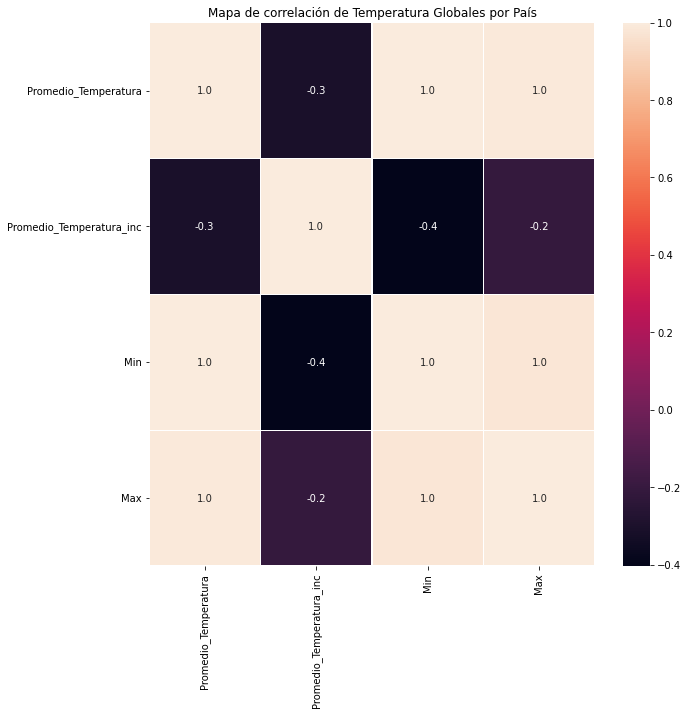

In [ ]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df2.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Mapa de correlación de Temperatura Globales por País')
plt.savefig('graph.png')
plt.show()

Se decidió no modificar las columnas de la Base de Datos de Temperaturas de los Países, ya que en la mayoría de los casos se muestra una muy buena correlación. Para la variable de incertidumbre, es normal la variación de este valor a través de los registros

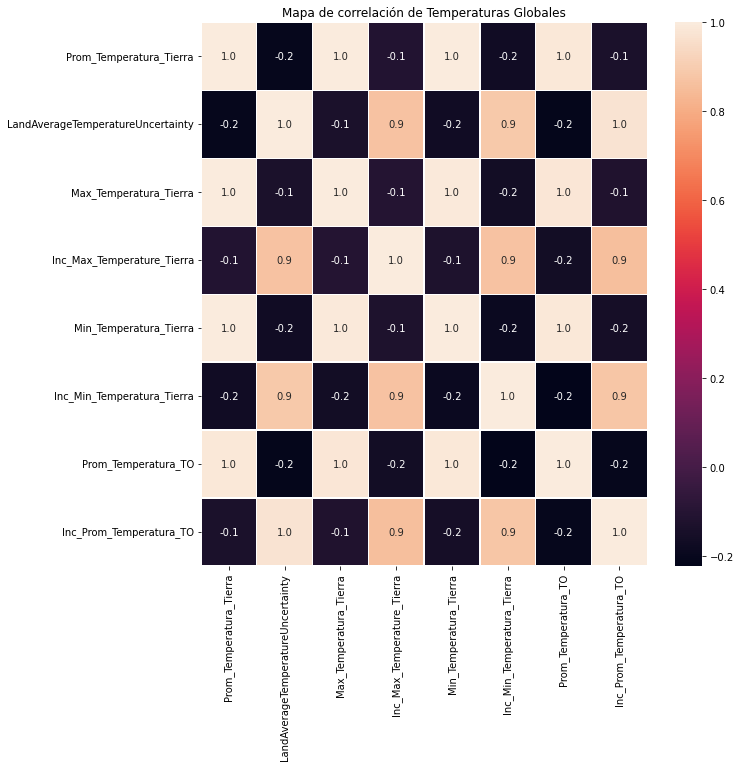

In [ ]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df3.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Mapa de correlación de Temperaturas Globales')
plt.savefig('graph.png')

plt.show()

En las temperaturas globales observamos una gran cantidad de variables correlacionadas entre ellas, por esto mismo no se desean eliminar o modificar alguna de éstas.

Series de Tiempo de los países de Interés

In [79]:
#Librerías para graficas
from matplotlib import pyplot
from pandas import Series
import matplotlib.pyplot as plt

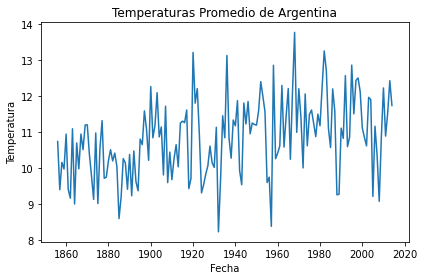

In [189]:
#Serie de Tiempo de Argentina 
x = np.arange(1856,2015)
y = Arg_csv['Promedio_Temperatura']
A1 = plt.plot(x,y)
pyplot.title('Temperaturas Promedio de Argentina')
pyplot.ylabel('Temperatura')
pyplot.xlabel('Fecha')
plt.tight_layout()

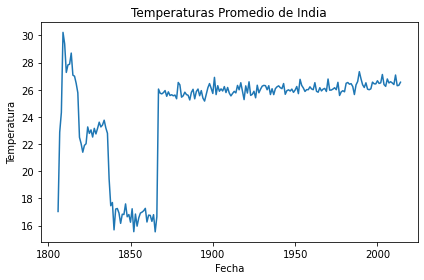

In [192]:
#Serie de Tiempo de India
pyplot.title('Temperaturas Promedio de India')
pyplot.ylabel('Temperatura')
pyplot.xlabel('Fecha')
x = np.arange(1806,2015)
y = Ind_csv['Promedio_Temperatura']
A2 = plt.plot(x,y)
plt.tight_layout()

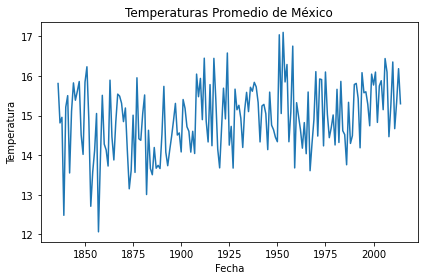

In [193]:
#Serie de Tiempo de Mexico
pyplot.title('Temperaturas Promedio de México')
pyplot.ylabel('Temperatura')
pyplot.xlabel('Fecha')
x = np.arange(1836,2015)
y = Mex_csv['Promedio_Temperatura']
A3 = plt.plot(x,y)
plt.tight_layout()

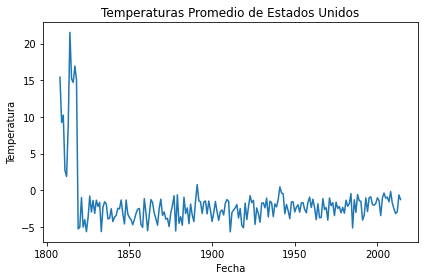

In [148]:
#Serie de Tiempo de Estados Unidos
pyplot.title('Temperaturas Promedio de Estados Unidos')
pyplot.ylabel('Temperatura')
pyplot.xlabel('Fecha')
x = np.arange(1808,2015)
y = USA_csv['Promedio_Temperatura']
A4 = plt.plot(x,y)
plt.tight_layout()

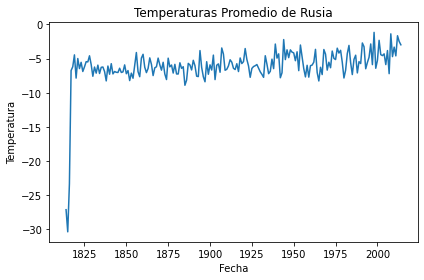

In [149]:
#Serie de Tiempo de Rusia
pyplot.title('Temperaturas Promedio de Rusia')
pyplot.ylabel('Temperatura')
pyplot.xlabel('Fecha')
x = np.arange(1814,2015)
y = Rus_csv['Promedio_Temperatura']
A5 = plt.plot(x,y)
plt.tight_layout()

Creación de una base de datos con solamente la información de nuestros paises de interés

In [134]:
paises = pd.concat([Arg, Ind, Mex, USA, Rus])

###**8. Estadística básica de los datos**

Para analizar el impacto del cambio climático a través de las temperaturas promedio, máximas y mínimas de la Tierra junto con su incertidumbre, se realizará el uso de las medidas estadísticas por las siguientes razones: 

* Contar: Conocer el número de registros que se tiene.
* Promedio: Cuantificar la temperatura promedio.
* Desviación estándar: Cuantificar la dispersión de las temperaturas.
* Mínimo: Cuantificar la temperatura mínima registrada.
* Máximo: Cuantificar la temperatura máxima registrada.
* 1er, 2do, 3er cuartíl: Conocer la distribución de las temperaturas.



In [ ]:
#Descripción de df3
df3_summary = df3.describe()
df3_summary

,Prom_Temperatura_Tierra,LandAverageTemperatureUncertainty,Max_Temperatura_Tierra,Inc_Max_Temperature_Tierra,Min_Temperatura_Tierra,Inc_Min_Temperatura_Tierra,Prom_Temperatura_TO,Inc_Prom_Temperatura_TO
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [ ]:
#Covarianza de df3
df3.cov()

,Prom_Temperatura_Tierra,LandAverageTemperatureUncertainty,Max_Temperatura_Tierra,Inc_Max_Temperature_Tierra,Min_Temperatura_Tierra,Inc_Min_Temperatura_Tierra,Prom_Temperatura_TO,Inc_Prom_Temperatura_TO
Prom_Temperatura_Tierra,18.174812,-0.136699,18.295532,-0.269670,17.639358,-0.318273,5.366879,-0.041226
LandAverageTemperatureUncertainty,-0.136699,0.050189,-0.128316,0.113270,-0.153681,0.088766,-0.059373,0.016031
Max_Temperatura_Tierra,18.295532,-0.128316,18.572471,-0.264779,17.791761,-0.307458,5.402156,-0.038234
Inc_Max_Temperature_Tierra,-0.269670,0.113270,-0.264779,0.340126,-0.298722,0.225875,-0.121412,0.036926
Min_Temperatura_Tierra,17.639358,-0.153681,17.791761,-0.298722,17.270967,-0.343721,5.222922,-0.047380
Inc_Min_Temperatura_Tierra,-0.318273,0.088766,-0.307458,0.225875,-0.343721,0.198771,-0.125960,0.028873
Prom_Temperatura_TO,5.366879,-0.059373,5.402156,-0.121412,5.222922,-0.125960,1.623313,-0.019039
Inc_Prom_Temperatura_TO,-0.041226,0.016031,-0.038234,0.036926,-0.047380,0.028873,-0.019039,0.005415


In [ ]:
#Correlación de df3
df3.corr()

,Prom_Temperatura_Tierra,LandAverageTemperatureUncertainty,Max_Temperatura_Tierra,Inc_Max_Temperature_Tierra,Min_Temperatura_Tierra,Inc_Min_Temperatura_Tierra,Prom_Temperatura_TO,Inc_Prom_Temperatura_TO
Prom_Temperatura_Tierra,1.000000,-0.143129,0.995807,-0.108462,0.995611,-0.167451,0.988066,-0.131412
LandAverageTemperatureUncertainty,-0.143129,1.000000,-0.132905,0.866944,-0.165066,0.888717,-0.208008,0.972405
Max_Temperatura_Tierra,0.995807,-0.132905,1.000000,-0.105349,0.993404,-0.160020,0.983855,-0.120563
Inc_Max_Temperature_Tierra,-0.108462,0.866944,-0.105349,1.000000,-0.123251,0.868702,-0.163396,0.860425
Min_Temperatura_Tierra,0.995611,-0.165066,0.993404,-0.123251,1.000000,-0.185512,0.986402,-0.154931
Inc_Min_Temperatura_Tierra,-0.167451,0.888717,-0.160020,0.868702,-0.185512,1.000000,-0.221746,0.880062
Prom_Temperatura_TO,0.988066,-0.208008,0.983855,-0.163396,0.986402,-0.221746,1.000000,-0.203072
Inc_Prom_Temperatura_TO,-0.131412,0.972405,-0.120563,0.860425,-0.154931,0.880062,-0.203072,1.000000


**Conclusión para estadística básica de los datos**

Con los resultados se observa que en cuestión al promedio de las temperaturas promedio en la Tierra es de 8.57 con una desviación estándar de 4.26. Dentro de las temperaturas máximas registradas, la mayor es de 21 mientras que la menor es de 5.9, con una desviación estándar de 4.3. Para las temperaturas mínimas registradas, la mayor es de 9.71 mientras que la menor es de -5.4, con una desviación estándar de 4.15.  

Con la información brindada por los cuartíles, se sabe que el 75% de las temperaturas promedio de la Tierra son menores a 12.85. Para las temperaturas máximas el 75% de los datos son menores a 18.45. Al igual, para las temperaturas mínimas el 75% de los datos son menores a 6.77. 

Con esto, se observa que las temperaturas en la Tierra varían en aproximadamente 4 unidades, tanto para las temperaturas promedio,como para las temperaturas máximas y mínimas. Asimismo, brinda información del comportamiento de las temperaturas en la Tierra, para así hacer referencia a ellas en análisis posteriores. 

Para la correlación, nos percatamos de que la temperatura promedio aparenta estar relacionada linealmente de manera positiva con las temperaturas máximas, mínimas y las temperaturas promedio de Tierra y océanos.

Con la covarianza, podemos confirmar que se tiene una relación lineal fuerte éstas mismas variables.

###**9. Gráficas**

Puesto que el objetivo principal es conocer el comportamiento del cambio climático en diferentes paises en base a sus temperaturas promedio, se tiene lo siguiente.

Se realizará una gráfica de Violín para conocer la concentración de las temperaturas promedio en los países de interés, los cuales son: Argentina, India, México, Estados Unidos y Rusia. 

Text(0.5, 1.0, 'Promedio de Temperatura por País')

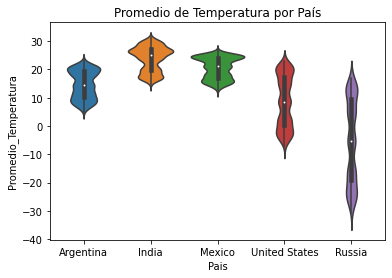

In [135]:
sns.violinplot(
    x='Pais',
    y='Promedio_Temperatura',
    data=paises[paises.Pais.isin(paises.Pais.value_counts()[:5].index)]
)
plt.title("Promedio de Temperatura por País")

**Conclusión de gráfica de Violín**

Se observa que las temperaturas promedio en los paises de Argentina, India y México son similares entre ellas. Asimismo, para dichos paises se encuentra el patrón que las temperaturas promedio tienden a ser más frecuente en temperaturas más cálidas. En el caso de Rusia y Estados Unidos se observa que no existe un patrón de concentración en alguna temperatura, además su rango es mayor, en donde Rusia tiene temperaturas menores a -30 hasta mayores a 20, mientras que Estados Unidos tiene en un rango de -10 hasta 20 grados. 

Continuando con un gráfico Boxplot para los mismos paises con el fin de visualizar la dispersión de sus temperaturas promedio, se tiene lo siguiente: 

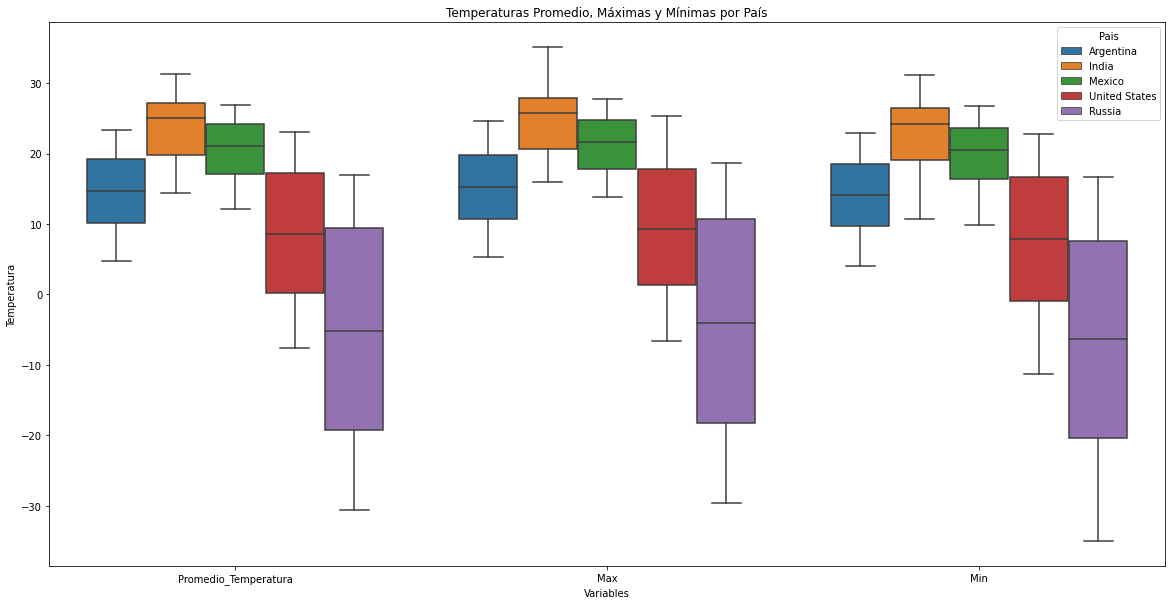

In [136]:
mdata = pd.melt(paises,id_vars = "Pais",value_vars = ['Promedio_Temperatura', 'Max', 'Min'])
plt.figure(figsize = (20,10))
sns.boxplot(x = "variable", y = "value", hue="Pais",data= mdata)
plt.xlabel("Variables")
plt.ylabel("Temperatura")

plt.title("Temperaturas Promedio, Máximas y Mínimas por País")
plt.show()

**Conclusión para gráfico Boxplot**

Con el gráfico anterior, observamos que las temperaturas promedio de Argentina, India y México no varian tanto a comparación de las de Rusia y Estados Unidos. 

Por consiguiente, con las gráficas anteriores observamos un comportamiendo similar para los países de Argentina y México. Enfocándonos en las temperaturas promedio de dichos países, mediante un Histograma, se tiene lo siguiente: 

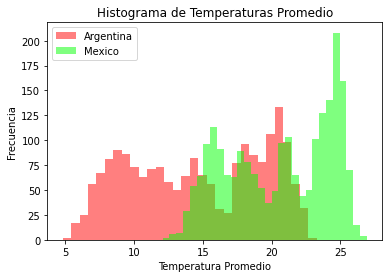

In [137]:
#Histograma Multivariado
m = plt.hist(paises[paises["Pais"] == "Argentina"].Promedio_Temperatura,bins=30,fc = (1,0,0,0.5),label = "Argentina")
b = plt.hist(paises[paises["Pais"] == "Mexico"].Promedio_Temperatura,bins=30,fc = (0,1,0,0.5),label = "Mexico")
plt.legend()
plt.xlabel("Temperatura Promedio")
plt.ylabel("Frecuencia")
plt.title("Histograma de Temperaturas Promedio")
plt.show()

**Conclusión para Histograma**

Con la gráfica anterior observamos como las temperaturas de Argentina y México difieren. Para el caso de Argentina se tienen registros de temperaturas de 5 hasta aproximadamente 23, mientras que para México se tienen registros desde aproximadamente 12 hasta mayores a 25. Igualmente la temperatura promedio más frecuente en Argentina es 20 mientras que para México es 25. 

Con esto, observamos que las temperaturas promedio de Argentina son menores que las de México. 

A continuación, se realizarán dos gráficas tipo Hexplot para comparar las temperaturas máximas con las temperaturas promedio de todos los países y las temperaturas máximas con las temperaturas promedio de México, con esto se tiene:

Text(0, 0.5, 'Temperatura máxima')

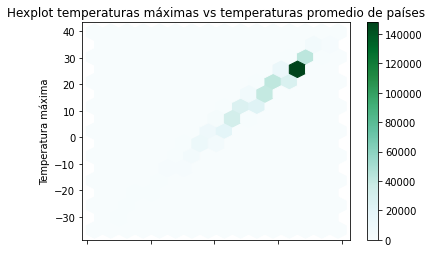

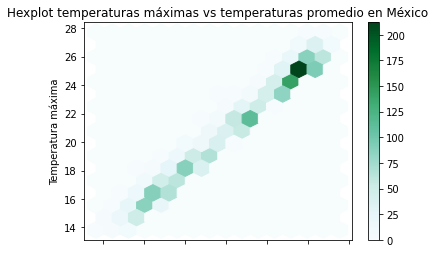

In [ ]:
#Hexplot
df2[df2['Max'] < 50].plot.hexbin(x='Promedio_Temperatura', y='Max', gridsize=15)
plt.title("Hexplot temperaturas máximas vs temperaturas promedio de países")
#plt.xlabel('Temperatura promedio')
plt.ylabel('Temperatura máxima')
Mex[Mex['Max'] < 50].plot.hexbin(x='Promedio_Temperatura', y='Max', gridsize=15)
plt.title("Hexplot temperaturas máximas vs temperaturas promedio en México")
#plt.xlabel('Temperatura promedio')
plt.ylabel('Temperatura máxima')

**Conclusión para gráfica Hexplot**

Con lo anterior parece haber una relación lineal de las temperaturas máximas con la temperatura promedio en los países asi como en México. Asimismo, hay una mayor frecuencia de registros en las temperaturas de (25-30) para los países mientras que para México se cierra en aproximadamente 25. 

**La importancia en la relación entre las temperaturas globales de la Tierra y del océano**

La relación que existe entre las temperaturas del océano y de la Tierra es de vital importancia conocer.
Esto ya que, es sustancial analizar el impacto que puede generarse por el aumento de las temperaturas promedio en alguno de los medios.
Puesto que, si se sabe que las temperaturas de la Tierra se espera vayan a la alza, poder tomar medidas ante el comportamiendo esperado en las temperaturas del océano.

Continuando con el objetivo secundario, el cual es "generar pronósticos de los impactos del cambio climático en países de interés y de manera global", es útil conocer el efecto del cambio climático. Con el fin de conocer su impacto, es preciso identificar la relación que existe entre las temperaturas promedio en Tierra y en océano.

Por consencuencia, se realizará un gráfico tipo Jointplot-hexagonal con el fin de observar la relación de las temperaturas promedio en Tierra con la temperatura promedio en Tierra y océano. 

Text(27.125, 0.5, 'Temperatura prom. en Tierra')

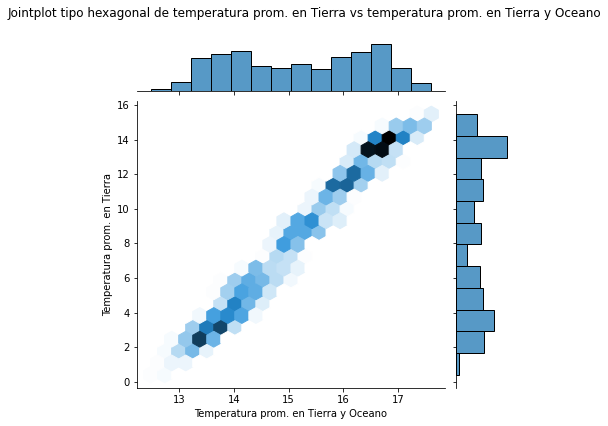

In [ ]:
sns.jointplot(x='Prom_Temperatura_TO', y='Prom_Temperatura_Tierra', data=df3[df3['Prom_Temperatura_TO'] < 100], kind='hex', 
              gridsize=20)
plt.suptitle("Jointplot tipo hexagonal de temperatura prom. en Tierra vs temperatura prom. en Tierra y Oceano")
plt.subplots_adjust(top=0.90)
plt.xlabel('Temperatura prom. en Tierra y Oceano')
plt.ylabel('Temperatura prom. en Tierra')

**Conclusión para gráfico Jointplot-hexagonal**

Pareciera que existe una relación lineal entre las temperaturas promedio en Tierra y las temperaturas promedio en Tierra y océano. Con ello, indica que al aumentar las temperaturas en la Tierra, tambien aumentaran en el océano. Asimismo, existen una mayor frecuencia para las temperaturas entre 12-14 para Tierra y 16-17 para Tierra y océano. 

**Conclusión para los objetivos y planteamiento del problema**

Se tiene que los temperaturas en los países de interés (Argentina, India, México, Estados Unidos y Rusia) se comportan de manera distinta. En Argentina, India y México sus temperaturas tienen un comportamiento similar, mientras que en Estados Unidos y Rusia éstas varían en mayor magnitud. 

Al igual, se observa que pareciera haber una relación lineal entre las temperaturas promedio de la Tierra y el océano. Por ello, es de vital importancia analizar las temperaturas de ambos medios, pues son afectadas de manera recíproca. 


**Conclusión Global**

Para facilitar la visualización de las series de tiempo de nuestros países de interés, reducimos los registros a que sean registros anuales, para una más clara representación. Además de esto, nos centramos en nuestros "países de interés", para reducir los tiempos de análisis y obtener conclusiones más concretas.

Partiendo de la visualización de las bases de datos, concluímos que con las herramientas que tenemos es posible analizar el impacto del cambio climático en nuestros países de interés, al igual que generar pronósticos de los impactos de los cambios climáticos de manera local y global. 


